<a href="https://colab.research.google.com/github/keymemory/DYC_Machine_Learning/blob/main/ML_day3_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

문제 정의: 1970년대 후반과 1980년대 초반의 자동차 연비를 예측하는 모델

 Auto MPG 데이터셋 - 실린더 수, 배기량, 마력(horsepower), 공차 중량 같은 속성이 포함
 

In [ ]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import RMSprop

dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


32768/30286 [================================] - 0s 1us/step


'/root/.keras/datasets/auto-mpg.data'

데이터 확인

In [ ]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


데이터 정제하기


In [ ]:
#누락된 행 삭제
dataset = dataset.dropna()

"Origin" 열은 수치형이 아니고 범주형이므로 원-핫 인코딩(one-hot encoding)으로 변환

In [ ]:
origin = dataset.pop('Origin')
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


데이터셋을 훈련 세트와 테스트 세트로 분할하기

In [ ]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)


특성과 레이블 분리

In [ ]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')


표준화 (스케일링)

In [ ]:
mean = np.mean(train_dataset, axis=0)
std = np.std(train_dataset, axis=0)

train_dataset = (train_dataset - mean) / std
test_dataset = (test_dataset - mean) / std


모델 만들기

In [ ]:
np.random.seed(7)

model = Sequential()
model.add(Dense(64, input_shape=[len(train_dataset.keys())], activation='relu'))
model.add(Dense(64,  activation='relu'))
model.add(Dense((1))) # 출력상 아무것도 선언 안 했음녀 linear


모델 확인

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


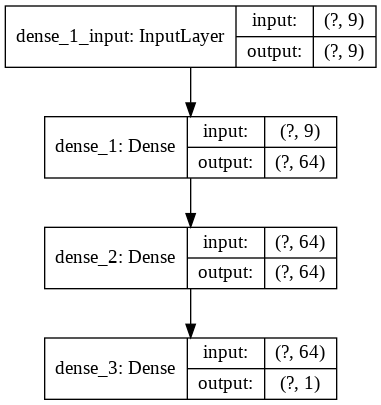

In [ ]:
model.summary()
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True,rankdir='TB', expand_nested=False, dpi=96)


모델 설정


In [ ]:
model.compile(loss='mse',
                optimizer=RMSprop(0.001),
                metrics=['mae', 'mse'])


모데 학습하기


In [ ]:
history = model.fit(train_dataset, train_labels, validation_data=(test_dataset, test_labels), epochs=500)


Train on 314 samples, validate on 78 samples
Epoch 1/500
314/314 [==============================] - 0s 999us/step - loss: 570.9056 - mae: 22.5800 - mse: 570.9056 - val_loss: 572.6794 - val_mae: 22.5039 - val_mse: 572.6794
Epoch 2/500
314/314 [==============================] - 0s 69us/step - loss: 511.1079 - mae: 21.2338 - mse: 511.1079 - val_loss: 514.4802 - val_mae: 21.2072 - val_mse: 514.4802
Epoch 3/500
314/314 [==============================] - 0s 58us/step - loss: 453.3811 - mae: 19.8639 - mse: 453.3811 - val_loss: 449.9803 - val_mae: 19.7091 - val_mse: 449.9803
Epoch 4/500
314/314 [==============================] - 0s 57us/step - loss: 390.0420 - mae: 18.2780 - mse: 390.0421 - val_loss: 379.2088 - val_mae: 17.9394 - val_mse: 379.2088
Epoch 5/500
314/314 [==============================] - 0s 60us/step - loss: 321.4930 - mae: 16.4093 - mse: 321.4930 - val_loss: 302.4685 - val_mae: 15.8475 - val_mse: 302.4684
Epoch 6/500
314/314 [==============================] - 0s 53us/step - loss

모델 결과 그리기


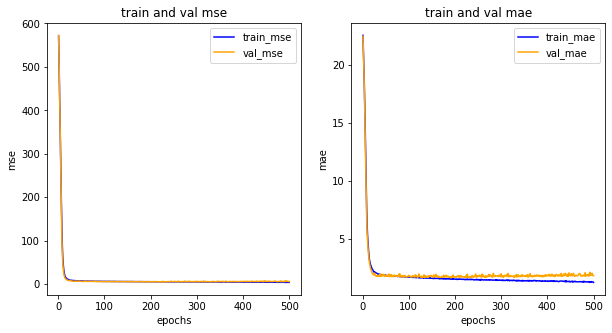

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
mse = his_dict['mse']
val_mse = his_dict['val_mse'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(mse) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, mse, color = 'blue', label = 'train_mse')
ax1.plot(epochs, val_mse, color = 'orange', label = 'val_mse')
ax1.set_title('train and val mse')
ax1.set_xlabel('epochs')
ax1.set_ylabel('mse')
ax1.legend()

mae = his_dict['mae']
val_mae = his_dict['val_mae']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, color = 'blue', label = 'train_mae')
ax2.plot(epochs, val_mae, color = 'orange', label = 'val_mae')
ax2.set_title('train and val mae')
ax2.set_xlabel('epochs')
ax2.set_ylabel('mae')
ax2.legend()

plt.show()


In [ ]:
# 모델 평가하기
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("테스트 세트의 평균 절대 오차: {:5.2f} MPG".format(mae))


테스트 세트의 평균 절대 오차:  1.86 MPG


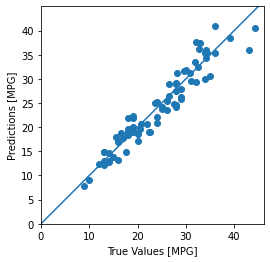

In [ ]:
# 모델 예측
test_predictions = model.predict(test_dataset).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
